# Criando uma IDS para detectar um ataque DDoS

Este relatório tem por objetivo demonstrar melhor a contrução de um IDS (Sistemas de Detecção de Intrusões), entendendo os seus pontos importantes e funcionamento, assim como também mostrar como trabalhei com os dados e entendi o problema dado.

Primeiro eu mostro os conceitos dos tópicos usados de forma breve, e então toda a parte teorica é colocada em prática com os códigos.

# IDS (Sistemas de Detecção de Intrusões)

A partir de informações coletadas do tráfego de uma rede, podemos desenvolver um programa para nos avisar quando um ataque está sendo feito, ou seja, um IDS, uma ferramenta para análisar uma rede e deixá-la mais segura, detectando ataques e emitindo alertas quando necessário.

Há diferentes caminhos para se tomar na criação de um IDS, podemos utilizar algoritmos de mineração de dados, metaheurísticas e algoritmos evolutivos, mas, nesse exemplo, estaremos trabalhando com aprendizado de máquina. A nossa missão será criar um modelo para aprender com os dados fornecidos pela rede, dados esses que possuem cenários aonde ocorreram ataques, e casos que apresentam o comportamento padrão da rede. A partir disso, o nosso modelo irá conseguir assimilar padrões para então detectar em casos reais, se um ataque está sendo feito ou não.

# DDoS (Ataque distribuído de negação de serviço)

Imaginemos um servidor onde há um site hospedado, sabemos que a função do server é nos ajudar a fazer todo processamento das nossas ações nesse site, os lugares que clickamos, as páginas que carregamos e etc. Porém, nesse processo, o server acaba também consumindo recursos como processamento, memória RAM, e rede para processar nossas requisições. Então, sabendo disso, e possuindo conhecimentos de programação, o que aconteceria se construíssemos um bot que incessávelmente fica pedindo tarefas para o servidor?

Esse tal servidor teria de processar todas elas, mas ao mesmo tempo, ele tem um limite de quanto de memória RAM ele pode guardar, ou um limite de banda da rede, limite do processador também, ou seja, o server não daria conta de tantas tarefas, qualquer tarefa nova de um usuário comum do site não seria processada e estaríamos então impedindo o fundionamento do server, ou melhor, estaríamos aplicando um ataque de negação de serviço (DoS).

Apesar de funcional, este processo está envolvendo apenas o nosso computador e o server, e não seria uma tarefa difícil para o servidor identificar qual ip está fazendo  tantas requisições, e uma vez identificado, não atender mais nenhuma tarefa vinda desse aparelho.

E é aí que surge a ideia do DDoS, ao invés de pedirmos essas tarefas utilizando unicamente um computador, se eu tiver diferentes computadores infectados com esse meu programa, eu consigo ordernar eles todos a fazerem milhares e milhares de requisições ao mesmo tempo para o servidor.

Em resumo, se antes eu tinha apenas uma máquina impedindo o funcionamento do server, agora eu tenho diversas máquinas (o máximo que forem infectadas), essas que possuem ips diferentes, estão em locais separados, tem provedoras de internet diferentes e etc. Ou seja, agora temos um ataque distribuído de negação de serviço (DDoS).


# Seleção de atributos

### Maldição da dimensionalidade

Um conjunto de dados é formado por suas linhas, colunas e informações, e com esses conceitos aplicado em um problema real, observamos que, respectivamente, as linhas e colunas descrevem os casos e características do problema, por exemplo:

Supondo um problema onde iremos criar um modelo pra predizer a etnia de uma pessoa com base em suas características, o nosso conjunto de dados será dado pelas colunas, podendo ser colunas do tipo altura, cor de pele, língua falada e etc. Enquando isso, cada linha do nosso dataset, irá representar o caso de uma pessoa.

Visto isso, nós podemos afirmar que cada coluna irá nos dar uma característica, ou seja, um atributo que nos informará sobre os dados, cada coluna será uma "unidade". Dizemos que quando estamos trabalhando com dados de 2 colunas, estamos trabalhando com dados bidimensionais, pois justamente existem 2 características que descrevem o problema.

Imagine quando estamos trabalhando com dados que possuem 800 colunas, nós estaremos trabalhando com dados em 800 dimensões, e conforme esse número aumenta, mais tempo o nosso modelo irá demorar para aprender, o que a partir de certo ponto pode se tornar prejudicial para a nossa solução.

A maldição da dimensionalidade nos diz que, quanto mais colunas, mais o modelo demora pra aprender e por conta de haver tantas, existe a possibilidade de haver aquelas que são irrelevantes mas ainda assim estarão sendo consideradas pelo modelo, fazendo com que a afirmação de "quanto mais dados mais o modelo aprende" não seje necessariamente verdade.

Então quando trabalhamos com datasets grandes, um dos problemas que encontramos é o elevado tempo e gasto de recursos para processar tantos dados, mesmo podendo parte dos dados ser irrelevante para o problema. E é com esse pensamento que surge formas de se encontrar aquelas colunas que são as mais importantes do dataset, sendo as ferramentas apresentadas nesse relatório a Random Forest e a Principal Component Analysis .

### Random Forest

O modelo da Random Forest é um modelo dado pelo conjunto de diferentes Decision Trees, e como o processo de aprendizagem de cada árvore é dado pelos passos de, selecionar um atributo dos dados, marcar uma divisão no ponto aonde irá melhor separar os dados diferentes, e por assim continuar dividindo as subdivisões até chegar ao fim dos atributos ou no limite de profundidade da árvore, podemos utilizar do recurso da divisão dos atributos para nos dizer quais são as colunas mais importantes.

A cada divisão dos dados, podemos calcular a pureza de cada nó árvore, onde essa pureza irá representar a quantidade de dados que estão do lado certo da divisão. Aqueles atributos que apresentarem mais impureza quando divididos pelos nós das árvores dentro da floresta, serão as colunas mais importantes do dataset.


### PCA (Análise de componentes principais)

O PCA é um modelo mateático aplicado no dataset que, de forma resumida, irá rotacionar os dados de forma não correlacionada, e então selecionar quais direções dentro das dimensões dos dados que apresentam mais variação para extrair essas informações como as mais relevantes (componentes principais). De forma geral o PCA irá receber o conjunto de dados e irá nos dizer quais que são as colunas mais importantes, fazendo assim, com que o nosso dataset diminua de tamanho e seja mais fácil de ser trabalhado.

A ideia por trás da extração de recursos é que é possível encontrar uma representação de seus dados que seja mais adequada para análise do que a representação original que você recebeu.

Um bom exemplo é analisar dentro de um dataset de rostos, como que o PCA se comportaria selecionando as colunas mais importantes do dataset que dá o formato de uma face.

O exemplo a seguir é a demonstração do PCA sendo aplicado nos dados "Labeled Faces" do Wild dataset:

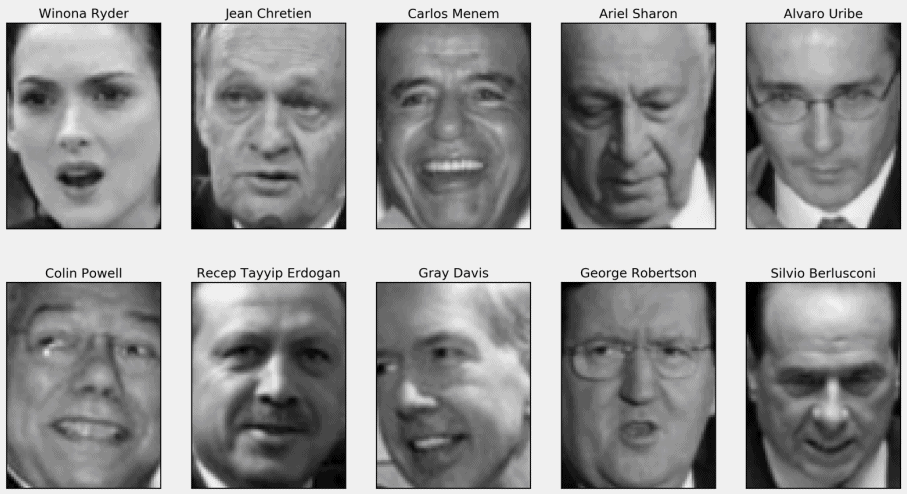

Podemos ver que esse dataset apresenta o rosto de diversas pessoas diferentes, e agora observe o que acontece quando pedimos para o PCA no dar quais são as 10 características mais importantes do dataset, depois 50, 100 e 500:

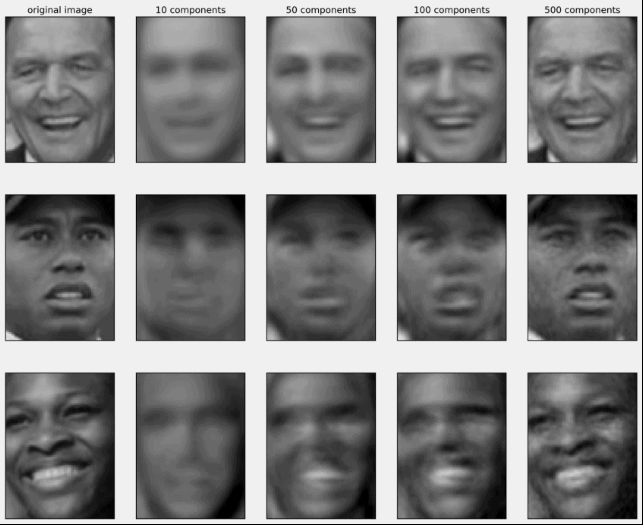

# Entendendo o Problema

Para entender melhor o problema, vamos dar uma olhada nos dados. Eles foram disponibilizados pela universidade New Brunswick do Canadá, são dados gerados em casos reais de ataques controlados, aonde foram feitos diferentes ataques em um periodo de dois dias.

Nós iremos construir uma IDS para identificar um ataque DDoS, e para isso vamos utilizar técnicas de redução dos dados. O modelo irá aprender dos dados vindos do tráfego de uma rede, iremos aprender o seu comportamento padrão, junto com periodos onde ataques de DDoS foram feitos, para então formar o nosso modelo capaz de determinar com dados novos de um possível cenário real se há algum ataque ou não.

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Carregando os arquivos de treino e teste
train = pd.read_csv("/content/drive/MyDrive/Atividade1_IC/data/treinamento_cicddos2019.csv")
test = pd.read_csv("/content/drive/MyDrive/Atividade1_IC/data/teste_cicddos2019.csv")

test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,3.756993,0.488582,3.338476,0.458445,3.798505,0.343780,508317528,1.753001e+05,2.086957,...,0.000000,0.021739,0.021739,1.739398e+05,0.000000,1.739398e+05,1.739398e+05,0.595400,0.934783,1
1,1,4.919981,0.628274,4.356312,0.668750,4.839029,0.482539,508317528,4.497374e+06,2.795620,...,5984.259500,23365.240876,2641.218978,2.009855e+06,109492.456256,2.087973e+06,1.917833e+06,0.667323,0.934307,1
2,93506,4.718499,0.513442,4.426268,0.652470,4.473980,0.376770,508317528,9.916249e+06,3.428571,...,1181.485486,10276.107143,6287.410714,3.712369e+06,222830.725194,3.869251e+06,3.548468e+06,0.735032,0.875000,1
3,8849,4.543295,0.199904,4.152334,0.234966,4.508233,0.175975,508317528,2.042906e+06,2.542553,...,403.582537,2363.617021,1084.542553,4.321098e+05,882.517349,4.324916e+05,4.295558e+05,0.641317,0.957447,1
4,283,4.584967,0.617035,4.273378,0.800042,4.359523,0.406899,499671137,6.383978e+06,5.989796,...,31225.970704,85822.173469,4742.367347,1.347777e+06,123584.594133,1.422363e+06,1.179181e+06,0.682908,0.846939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1137957464,2.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1
7189,47313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1137957464,3.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1
7190,135936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1137957464,3.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1
7191,129041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1409609978,3.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1


Vemos que os dados são constituidos de 16.598 linhas e 87 colunas, sendo a última a coluna a target com os valores 0 e 1, indicando respectivamente se não era um ataque ou se era.

Agora vamos aplicar algumas técnicas de pré-processamento.

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler

# Removendo os espaços espaços na frente do nome das colunas (não importante)
train.columns = [i[1:] if i[0] == " " else i[:] for i in train.columns]
test.columns = [i[1:] if i[0] == " " else i[:] for i in test.columns]

# Removendo coluna desnecessária
test.drop('Unnamed: 0', axis=1, inplace=True)

# Aplicar mudanças no dataset inteiro
data = pd.concat([train, test], axis=0)

# Separando os dados do target
y = data['Label']
X = data.drop('Label', axis=1)

# Substituindo os valores 0 por NaN
X.replace(0, np.nan, inplace=True)

# Removendo colunas que possuem mais de 70% dos valores como número faltantes e substituindo por 0 os valores NaN restantes
X = X.dropna(axis=1, thresh=X.shape[0] * 0.3).fillna(0)

# Reescalando caso necessário
rescale = True
if(rescale):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)

# Voltando a separar os dados antes concatenados
X_train = X.iloc[:train.shape[0], :]
X_test = X.iloc[train.shape[0]:, :]
y_train = y.iloc[:train.shape[0]]
y_test = y.iloc[train.shape[0]:]

# Observando como os nossos dados estão distribuidos dentro de suas categorias (0 e 1)
print(y_train.value_counts())   # Dados de treino
print(y_test.value_counts())    # Dados de teste

1    10631
0     5967
Name: Label, dtype: int64
0    4887
1    2306
Name: Label, dtype: int64


Podemos ver que quando treinarmos o modelo utilizando tais dados, estaremos utilizando 10631 casos categorizados como ataques, e 5967 como não ataques para alimentar o algoritmo. Casos classificados como ataques representam 64% dos dados que nós temos. Imagine se tivéssemos um modelo que ao invés de aprender, simplesmente disse-se que os dados são todos ataques, ele teria uma eficácia de 64% também, mesmo não aprendendo nada, o que é um pouco estranho.

Esse fenômeno é o que chamamos de paradóxo da acurácia. Isso occore quando temos dados desbalanceados e utilizamos o critério de acurácia para dizer o quão bem o modelo performou.

Para isso, podemos balancear os dados, o que irá fazer com que o modelo aprenda ambas classes igualmente, sem aprender mais de uma do que da outra e acabar dando uma falsa performance nos resultados. Além disso, iremos lá na frente do relatório utilizar o método *f-measure* ao invés da acurácia para avaliar o modelo.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Balanceando os dados removendo dos casos de ataques para ficar igual aos de não ataques (no dataset de treino)
rus = RandomUnderSampler()
X_balanced, y_balanced = rus.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_balanced, columns=X_train.columns)
y_train = pd.Series(y_balanced, name=y_train.name)

y_train.value_counts()

0    5967
1    5967
Name: Label, dtype: int64

# Aplicando PCA

Agora com os dados da forma que queremos, podemos partir para aplicar alguns dos conceitos mostrados nesse relatório. O próximo mostrado será o do PCA.

(Neste exemplo eu estarei aplicando alguns comandos a mais para conseguir extrair os nomes das colunas mais importantes).

In [ ]:
from sklearn.decomposition import PCA

n = 10                                                               # Número de colunas a serem selecionadas

# Aplicando o PCA
pca_model = PCA(n_components=n).fit(X_train)
pca = pca_model.transform(X_train)

# O indice das 10 colunas mais importantes do dataset
important_columns = [np.abs(pca_model.components_[i].argmax()) for i in range(n)]

# As colunas do dataset
columns = X_train.columns

# O nome das 10 colunas mais importantes do dataset
name_important_columns = [columns[important_columns[i]] for i in range(n)]

# Dados de treino aplicado PCA
X_train_pca = pd.DataFrame(pca, columns=name_important_columns)

# Dados de teste aplicado o PCA
X_test_pca = pca_model.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=name_important_columns)

X_train_pca

,Down/Up Ratio,Packet Length Variance,Flow IAT Max,Total Length of Fwd Packets,Subflow Fwd Packets,Flow IAT Min,Fwd Header Length,Flow IAT Min,Fwd Header Length,Bwd Packet Length Min
0,1.890243,-1.425230,-1.029164,-0.010238,0.174920,0.790799,-0.083603,-0.498955,0.352941,0.303674
1,0.728450,-1.204956,-0.617359,-0.171628,0.296968,0.375650,-0.895143,-0.573401,1.492346,0.634641
2,0.649004,-1.221414,-0.651493,-0.193057,0.290099,0.416049,-0.960539,-0.669366,1.611508,0.676296
3,0.556163,-1.172735,-0.597284,-0.242022,0.323119,0.395329,-0.885367,-0.627517,1.540812,0.592478
4,2.099023,-1.371742,-1.074455,-0.024974,0.112466,0.506360,-0.114710,-0.270117,0.389662,-0.219381
...,...,...,...,...,...,...,...,...,...,...
11929,-2.350339,-0.197135,-0.209984,-0.346758,0.265126,0.095590,-0.801861,-0.810300,1.652112,-0.077799
11930,0.778119,-0.954457,-1.503366,-0.069989,-0.020707,0.874723,1.178129,0.030490,-1.441255,0.488569
11931,-7.650256,1.864517,1.098346,-0.832291,-0.003778,-0.093934,1.419844,0.508584,-1.170062,-0.184048
11932,-7.908510,1.845687,1.076231,-0.927343,0.064651,-0.045014,1.001454,0.239568,-0.948914,-0.218260


# Random Forest para seleção de atributos

Agora para a seleção de atributos utilizando o random forest:



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Criando e treinando o Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Retorna a importancia das colunas
importance = clf.feature_importances_

# Ordenando pela importância de cada uma e escolhendo as 10 primeiras
df_importance = pd.DataFrame({'importance': importance, 'columns_names': X_train.columns}).sort_values(by='importance', ascending=False)
df_importance = df_importance.iloc[:10, :]

# Dados de treino aplicado Random Forest
X_train_forest = X_train[df_importance.columns_names]

# Dados de teste aplicando Random Forest
X_test_forest = X_test[df_importance.columns_names]

X_train_forest


,Inbound,Min Packet Length,Fwd Packet Length Min,Flow Bytes/s,Fwd Packet Length Mean,Avg Fwd Segment Size,Average Packet Size,Packet Length Mean,Subflow Fwd Bytes,Bwd Packets/s
0,-1.412381,-0.647804,-0.646506,-0.527551,-0.692084,-0.692084,-0.683117,-0.722324,-0.119330,-0.128070
1,-1.412381,-0.647804,-0.648656,-0.527551,-0.694255,-0.694255,-0.684214,-0.723638,-0.119386,-0.131262
2,-1.412381,-0.647804,-0.648656,-0.527551,-0.694255,-0.694255,-0.684214,-0.723638,-0.119386,-0.131262
3,-1.412381,-0.647804,-0.648656,-0.527551,-0.694255,-0.694255,-0.684214,-0.723638,-0.119386,-0.131262
4,-1.412381,-0.647804,-0.646506,-0.527551,-0.692084,-0.692084,-0.683117,-0.722324,-0.119330,-0.130881
...,...,...,...,...,...,...,...,...,...,...
11929,1.049349,0.123903,0.120929,-0.158183,0.109555,0.109555,0.055311,0.082984,-0.084729,-0.131262
11930,0.066355,-0.013141,-0.015738,-0.063179,-0.055031,-0.055031,-0.038567,-0.078420,-0.102937,-0.065068
11931,1.051884,2.460935,2.451536,2.288817,2.436823,2.436823,2.477876,2.436805,-0.038745,-0.131262
11932,1.050828,2.320755,2.311741,2.746556,2.295678,2.295678,2.335394,2.294346,-0.042387,-0.131262


Comparando as colunas selecionadas por ambos os métodos:

In [ ]:
pd.DataFrame([name_important_columns, df_importance.columns_names], index=['PCA', 'Forest'])

,0,1,2,3,4,5,6,7,8,9
PCA,Down/Up Ratio,Packet Length Variance,Flow IAT Max,Total Length of Fwd Packets,Subflow Fwd Packets,Flow IAT Min,Fwd Header Length,Flow IAT Min,Fwd Header Length,Bwd Packet Length Min
Forest,Inbound,Min Packet Length,Fwd Packet Length Min,Flow Bytes/s,Fwd Packet Length Mean,Avg Fwd Segment Size,Average Packet Size,Packet Length Mean,Subflow Fwd Bytes,Bwd Packets/s


# PCA vs Random Forest

Agora que temos ambos os dados com o PCA e Random Forest aplicados em variáveis diferentes, podemos comparar eles utilizando um modelo de Support Vector Machine para aprender com cada dataset reduzido, e ver qual modelo aparenta aprender melhor.

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_pca, y_train)

print(f"""
Score utilizandos os dados escolhidos pelo PCA:
Training set: {clf.score(X_train_pca, y_train):.4f}
Test set: {clf.score(X_test_pca, y_test):.4f}""")

clf = RandomForestClassifier()
clf.fit(X_train_forest, y_train)

print(f"""
Score utilizandos os dados escolhidos pelo Random Forest:
Training set: {clf.score(X_train_forest, y_train):.4f}
Test set: {clf.score(X_test_forest, y_test):.4f}""")


Score utilizandos os dados escolhidos pelo PCA: 
Training set: 0.9076 
Test set: 0.9555

Score utilizandos os dados escolhidos pelo Random Forest: 
Training set: 0.9988 
Test set: 0.8950


# Se aprofundando no PCA e Random Forest

Muito bem, criamos modelos que aprenderam com os dados do ataque DDoS, mas como que de fato o número de colunas irá impactar dentro do nosso problema?

O cógido a seguir gera um gráfico mostrando como que a acurácia do modelo varia conforme aumentamos o número de colunas feitos nos métodos de PCA e Random Forest. Esse exemplo serve apenas como curiosidade, o seu tempo de processamento é muito grande para ser usado na prática.

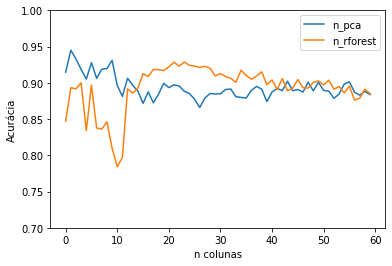

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

clf = RandomForestClassifier()  # Criando modelo
clf.fit(X_train, y_train)       # Treinando modelo

# Ordenando as colunas da mais importante pra menas importante usando random forest
df_importance = pd.DataFrame({'importance': importance, 'columns_names': X_train.columns}).sort_values(by='importance', ascending=False)

accuracy_pca = []               # Mantém track da acurácia do modelo usando pca em casa instância
accuracy_forest = []            # Mantém track da acurácia do modelo usando random forest em casa instância

for i in range(1, X.shape[1]):    # A cada iteração, um modelo MLP irá aprender usando n numero de colunas selecionadas pelo PCA e Random Forest

    # PCA
    pca_model = PCA(n_components=i).fit(X_train)
    X_train_pca = pca_model.transform(X_train)
    X_test_pca = pca_model.transform(X_test)

    # Random Forest
    X_train_forest = X_train[df_importance.columns_names[:i]]
    X_test_forest = X_test[df_importance.columns_names[:i]]

    model_1 = MLPClassifier().fit(X_train_pca, y_train)         # Modelo de MLP 1

    model_2 = MLPClassifier().fit(X_train_forest, y_train)      # Modelo de MLP 2

    accuracy_pca.append(f1_score(y_test, model_1.predict(X_test_pca)))                # Vendo a acurácia do modelo treinado por n colunas do PCA
    accuracy_forest.append(f1_score(y_test, model_2.predict(X_test_forest)))          # Vendo a acurácia do modelo treinado por n colunas do Random Forest

# Plotando o gráfico para nos mostrar as acurácias conforme o número n de colunas n aumenta
fig, axe = plt.subplots()

axe.plot(accuracy_pca, label="n_pca")
axe.plot(accuracy_forest, label="n_rforest")
axe.set(xlabel="n colunas", ylabel="Acurácia")

axe.set_ylim(0.7, 1)

plt.legend()
plt.show()

Aparentemente, até as 20 colunas que temos no problema, o modelo aparenta se dar bem com todas as informações.

# Random Grid Search

Com base nesse gráfico, temos agora uma forma de ver qual ferramenta escolher e quantas colunas utilizar. Junto a isso, agora, vamos criar um modelo que além de aprender com esses dados, irá ser um modelo tunado utilizando a técnica de random grid search.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Feature selection usando o random forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

importance = clf.feature_importances_

# 20 colunas mais importante do random forest
df_importance = pd.DataFrame({'importance': importance, 'columns_names': X_train.columns}).sort_values(by='importance', ascending=False)
df_importance = df_importance.iloc[:20, :]

X_train_forest = X_train[df_importance.columns_names]
X_test_forest = X_test[df_importance.columns_names]

# Setando como testar os hiper-parametro no random grid search
random_grid = {'n_estimators': np.linspace(start = 200, stop = 2000, num = 20, dtype=int),
               'max_depth': np.linspace(10, 200, num = 10),
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

model =  RandomForestClassifier(n_jobs=-1)
rf_random = RandomizedSearchCV(model, random_grid)        # Aplicando o Random Grid Search

search = rf_random.fit(X_train_forest, y_train)

# Matriz de confusão


Score utilizandos os dados escolhidos pelo Random Forest e Hiper-parâmetros otimizados: 
Training set: 1.0000 
Test set: 0.9631


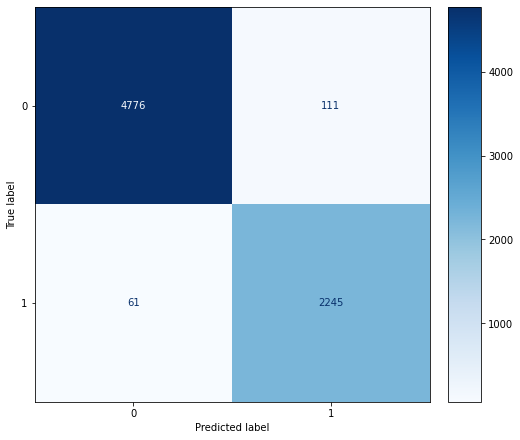

In [ ]:
print(f"""
Score utilizandos os dados escolhidos pelo Random Forest e Hiper-parâmetros otimizados:
Training set: {f1_score(y_train, search.predict(X_train_forest)):.4f}
Test set: {f1_score(y_test, search.predict(X_test_forest)):.4f}""")

from sklearn.metrics import plot_confusion_matrix
fig, axe = plt.subplots(figsize=(10,6), constrained_layout=True)

plot_confusion_matrix(search, X_test_forest, y_test, ax= axe, cmap=plt.cm.Blues, values_format='.0f')
plt.show()

# Além do problema

Perfeito, conseguimos cumprir o desafio, criamos uma modelo para predizer ataques de DDoS com uma taxa de acerto que varia em volta de 96%.

Mas agora, podemos ir um pouco além do proposto para explorarmos algumas curiosidades, por exemplo, como outros modelos lidam com esses dados? como utilizar o cross-validation em um modelo?

Esses são tópicos que serão explorados nessa última parte do relatório, começando pelos diferentes modelos de machine learning e como eles se saem com os dados do DDoS, utilizando o método avaliativo de cross-validation.

In [ ]:

# Primeiro juntar os dados de teste e de treino para conseguir utilizar o cv (cross-validation)

X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Inbound
0,-0.900338,-0.768928,-0.927683,-0.84371,-0.839732,-0.520739,1.102752,-0.371750,-0.069640,-0.087621,-0.119330,-0.047986,-0.769192,-0.646506,-0.692084,-0.330769,-0.258219,-0.400495,-0.371185,-0.527551,-0.869077,-0.272592,-0.311621,-0.338324,-0.055541,-0.367131,-0.300774,-0.317358,-0.333711,-0.053698,-0.271835,-0.189661,-0.215441,-0.239078,-0.003684,0.078108,0.035388,-0.861684,-0.128070,-0.647804,-0.699656,-0.722324,-0.368887,-0.087722,-0.460745,1.591545,-0.543278,0.709190,-0.683117,-0.692084,-0.371185,0.078108,-0.069640,-0.119330,-0.087621,-0.047986,-0.417788,-0.115371,-0.264878,0.246272,-1.412381
1,-0.900338,-0.768928,-0.927683,-0.84371,-0.839732,-0.520739,0.277901,-0.372595,-0.059199,-0.168319,-0.119386,-0.047986,-0.771269,-0.648656,-0.694255,-0.330769,-0.258219,-0.400495,-0.371185,-0.527551,0.490307,-0.276486,-0.315463,-0.340391,-0.055541,-0.367131,-0.300774,-0.317357,-0.333710,-0.053699,-0.271835,-0.189662,-0.215441,-0.239078,-0.440281,0.078108,0.035385,0.496578,-0.131262,-0.647804,-0.701224,-0.723638,-0.373881,-0.087723,-0.460745,-0.730223,-0.543278,-0.730238,-0.684214,-0.694255,-0.371185,0.078108,-0.059199,-0.119386,-0.168319,-0.047986,-0.438226,-0.272834,-0.296151,0.246272,-1.412381
2,-0.900338,-0.768928,-0.927683,-0.84371,-0.839732,-0.520739,-1.331350,-0.372595,-0.069640,-0.168319,-0.119386,-0.047986,-0.771269,-0.648656,-0.694255,-0.330769,-0.258219,-0.400495,-0.371185,-0.527551,0.830235,-0.276485,-0.315464,-0.340391,-0.055539,-0.367131,-0.300774,-0.317358,-0.333711,-0.053698,-0.271835,-0.189662,-0.215441,-0.239078,-0.440281,0.078108,0.035385,0.836184,-0.131262,-0.647804,-0.701224,-0.723638,-0.373881,-0.087723,-0.460745,-0.730223,-0.543278,-0.730238,-0.684214,-0.694255,-0.371185,0.078108,-0.069640,-0.119386,-0.168319,-0.047986,-0.438226,-0.272834,-0.296151,0.246272,-1.412381
3,-0.900338,-0.768928,-0.927683,-0.84371,-0.839732,-0.520739,1.126773,-0.372595,-0.064419,-0.168319,-0.119386,-0.047986,-0.771269,-0.648656,-0.694255,-0.330769,-0.258219,-0.400495,-0.371185,-0.527551,0.830235,-0.276486,-0.315464,-0.340391,-0.055541,-0.367131,-0.300774,-0.317358,-0.333711,-0.053699,-0.271835,-0.189662,-0.215441,-0.239078,-0.440281,0.078108,0.035385,0.836184,-0.131262,-0.647804,-0.701224,-0.723638,-0.373881,-0.087723,-0.460745,-0.730223,-0.543278,-0.730238,-0.684214,-0.694255,-0.371185,0.078108,-0.064419,-0.119386,-0.168319,-0.047986,-0.438226,-0.272834,-0.296151,0.246272,-1.412381
4,-0.900338,-0.768928,-0.927683,-0.84371,-0.839732,-0.520739,0.278422,-0.365506,-0.069640,-0.087621,-0.119330,-0.047986,-0.769192,-0.646506,-0.692084,-0.330769,-0.258219,-0.400495,-0.371185,-0.527551,-0.869366,-0.243832,-0.283235,-0.323058,-0.055541,-0.367131,-0.300775,-0.317358,-0.333711,-0.053699,-0.271835,-0.189661,-0.215441,-0.239078,0.432913,0.078108,0.035388,-0.861828,-0.130881,-0.647804,-0.699656,-0.722324,-0.368887,-0.087722,-0.460745,1.591545,-0.543278,0.709190,-0.683117,-0.692084,-0.371185,0.078108,-0.069640,-0.119330,-0.087621,-0.047986,0.8

# Cross validation em diferentes modelos de machine learning

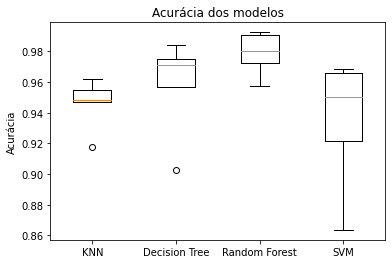

[array([0.9470133 , 0.91746877, 0.96187009, 0.95500285, 0.94837935]),
 array([0.97132826, 0.95653884, 0.98395515, 0.9751376 , 0.9027027 ]),
 array([0.97244797, 0.95758794, 0.99066874, 0.9924725 , 0.98031496]),
 array([0.92161324, 0.86359687, 0.96584591, 0.96845794, 0.95004029])]

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

# modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt

accuracy_cv = []
# KNN
knn = KNeighborsClassifier()
accuracy_cv.append(cross_val_score(knn , X, y, scoring="f1", cv=5))

# Decision Tree
tree = DecisionTreeClassifier()
accuracy_cv.append(cross_val_score(tree , X, y, scoring="f1", cv=5))

# Random Forest
rtree = RandomForestClassifier()
accuracy_cv.append(cross_val_score(rtree , X, y, scoring="f1", cv=5))

# SVM
svc = SVC()
accuracy_cv.append(cross_val_score(svc, X, y, scoring="f1", cv=5))


# Plotando performance dos modelos

fig, axs = plt.subplots()

# Gráfico de barras
axs.set_title('Acurácia dos modelos')           # Titulo do gráfico
axs.boxplot(accuracy_cv)


nome_modelos = ['KNN', 'Decision Tree', 'Random Forest', 'SVM']
axs.set_xticklabels(nome_modelos)
axs.set(ylabel = "Acurácia")

plt.show()

accuracy_cv

Por último vamos criar um modelo MLP (Multilayer perceptron) tunando os seus parâmetros utilizando o Random grid search

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV

# Parametros para se variar no grid search
parametros = {
    'hidden_layer_sizes': range(20)
}

# Criando e treinando modelo
model =  MLPClassifier()
mlp = RandomizedSearchCV(model, parametros, scoring='f1', cv=5)        # Aplicando o Random Grid Search

search = mlp.fit(X, y)

# Importando um novo método de avaliação de modelo, o Area Under the Curve
from sklearn.metrics import roc_auc_score

print(f"Melhores parâmetros: {search.best_params_}\n Melhor Score: {search.best_score_}\n AUC: {roc_auc_score(y, search.predict(X))}")

{'mean_fit_time': array([ 8.85334368, 11.50504289, 11.16276779, 10.06051459, 10.59775949,
       11.03722301,  8.2542551 ,  9.45264125, 10.09323001,  9.0286581 ]), 'std_fit_time': array([0.87324738, 0.05550268, 0.03956762, 0.12457936, 0.08247395,
       0.04607609, 0.82816842, 0.12737256, 0.07345072, 0.03191223]), 'mean_score_time': array([0.00557513, 0.00769296, 0.00799479, 0.00757766, 0.0080585 ,
       0.00844994, 0.00625324, 0.00751715, 0.00738311, 0.00629168]), 'std_score_time': array([7.02828532e-05, 9.49142496e-04, 8.14211667e-04, 8.36409918e-04,
       8.22865691e-04, 8.76220911e-04, 1.99253982e-04, 1.16657699e-03,
       8.07194091e-04, 8.20351733e-05]), 'param_hidden_layer_sizes': masked_array(data=[1, 19, 18, 9, 13, 17, 2, 6, 12, 3],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': 1}, {'hidden_layer_sizes': 19}, {'hidden_layer_sizes

# Roc Curve

No handles with labels found to put in legend.


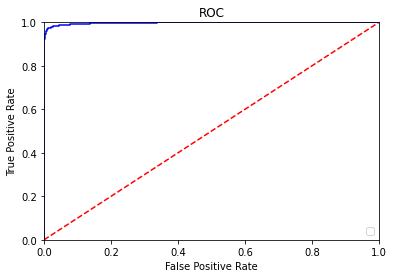

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Plotando a Area Under the Curve do nosso modelo
probs = search.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Por fim, aqui concluímos o nosso objetivo, entendemos os tópicos que envolvem o problema dado, assim como ele em si, e criamos um modelo capaz de resolve-lo.

